In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [2]:
data = pd.read_csv('data for project/merged_with_weather.csv')
data

date  tavg  tmin  tmax  prcp   snow   wdir  wspd  wpgt    pres  \
0     2011-01-01   2.1   0.7   3.4   0.5  153.3  268.3  20.0  44.2  1015.3   
1     2011-01-02   0.6  -1.4   2.0   0.1   96.7  283.3  12.1  28.3  1018.5   
2     2011-01-03  -1.0  -2.8   0.7   0.5   90.0  259.7   8.8  21.7  1021.1   
3     2011-01-04  -1.1  -4.4   0.3   0.0   90.0  190.7  12.2  29.1  1017.7   
4     2011-01-05  -4.1  -6.4  -0.9   2.3   83.3  155.7  15.8  33.7  1011.9   
...          ...   ...   ...   ...   ...    ...    ...   ...   ...     ...   
4012  2021-12-26  -4.1  -7.3  -0.4   0.0    0.0  103.7  12.7  29.8  1011.3   
4013  2021-12-27  -0.4  -4.3   2.6   1.7    0.0  113.7  16.7  30.3  1004.4   
4014  2021-12-28   3.3   1.1   5.5   6.1    0.0  136.3  16.4  43.6   996.8   
4015  2021-12-29   5.6   3.6   8.3   2.3    0.0  208.3   9.6  28.4  1004.4   
4016  2021-12-30  10.8   7.0  13.5   2.5    0.0  230.0  16.8  45.2  1012.1   

      tsun  windturbines_mw  
0       90        518229.00  
1       70         83077.00  
2       32         73095.00  
3       40        376606.00  
4      268        216599.00  
...    ...              ...  
4012   255        294921.35  
4013    19        603998.08  
4014     6        659450.45  
4015     6        241640.15  
4016     0        220220.08  

[4017 rows x 12 columns]

In [3]:
# Split the date column into year, month, and day
data[['year', 'month', 'day']] = data['date'].str.split('-', expand=True)
# Drop the 'date' column
data = data.drop(columns=['date'])

In [4]:
data.dtypes

tavg               float64
tmin               float64
tmax               float64
prcp               float64
snow               float64
wdir               float64
wspd               float64
wpgt               float64
pres               float64
tsun                 int64
windturbines_mw    float64
year                object
month               object
day                 object
dtype: object

In [5]:
# Convert the data type of year, month, and day columns to int
data[['year', 'month', 'day']] = data[['year', 'month', 'day']].astype(int)

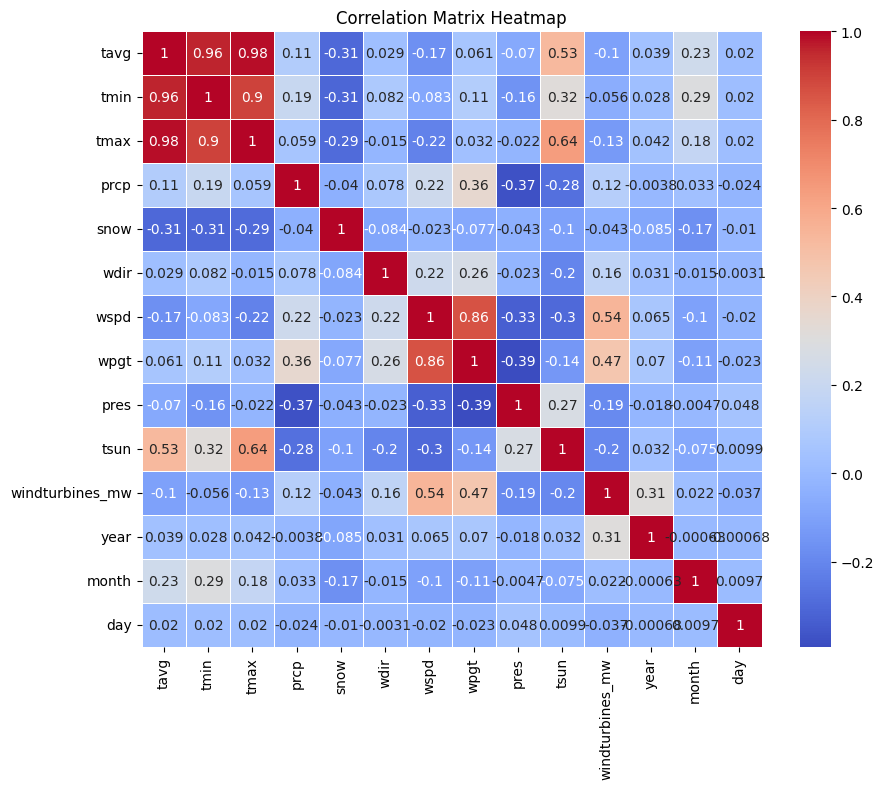

In [6]:
numerical_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [7]:
#As we can see there's a decent correllation between MW produced and wspd, wpgt (wind columns with values in it).
#There's also a slight correlation between MW produced by tubines and prcp (Total Precipitation).
#I would connect it in that case to a slighly windier weather once it rains.
#As we can see all other values are negatively correlated, that was also expected in that case.

In [8]:
X = numerical_data.drop(columns=['windturbines_mw'])  # Features
y = numerical_data['windturbines_mw']  # Target variable

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
#Starting with linearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'LinearRegression R^2 Score: {r2}')

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

LinearRegression R^2 Score: 0.4532219861466239
MAE: 140880.65100190128, MSE: 41325171758.29401, RMSE: 203285.93595793587


In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score

In [12]:
# Initialize the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)

#mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#print(f'Mean Squared Error: {mse}')
print(f'RandomForest R^2 Score: {r2}')

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

RandomForest R^2 Score: 0.6568075649985832
MAE: 105962.950519403, MSE: 25938289329.943462, RMSE: 161053.68462082284


In [13]:
from sklearn.svm import SVR

In [14]:
# Initialize the SVR model
model = SVR(kernel='rbf')

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
#mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#print(f'SVR Mean Squared Error: {mse}')
print(f'SVR R^2 Score: {r2}')

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

SVR R^2 Score: -0.08220299442505685
MAE: 199342.86233442198, MSE: 81792287708.82559, RMSE: 285993.50990682567


In [15]:
from sklearn.ensemble import GradientBoostingRegressor

In [16]:
# Initialize the Gradient Boosting Regressor model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
#mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#print(f'Gradient Boosting Mean Squared Error: {mse}')
print(f'Gradient Boosting R^2 Score: {r2}')

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

Gradient Boosting R^2 Score: 0.6421284785478396
MAE: 110027.5686763508, MSE: 27047726347.27477, RMSE: 164461.92978095193


In [17]:
from sklearn.neighbors import KNeighborsRegressor

In [18]:
# Initialize the K-Nearest Neighbors Regressor model
model = KNeighborsRegressor(n_neighbors=5)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
#mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#print(f'KNN Mean Squared Error: {mse}')
print(f'KNN R^2 Score: {r2}')

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

KNN R^2 Score: 0.25482918543427935
MAE: 171829.718261194, MSE: 56319586963.95949, RMSE: 237317.4813703354


In [19]:
from sklearn.tree import DecisionTreeRegressor

In [20]:
# Initialize the Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
#mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#print(f'Decision Tree Mean Squared Error: {mse}')
print(f'Decision Tree R^2 Score: {r2}')

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

Decision Tree R^2 Score: 0.19503474514381514
MAE: 155566.224079602, MSE: 60838816802.372696, RMSE: 246655.25902030285


In [21]:
from sklearn.linear_model import Ridge

In [22]:
# Initialize the Ridge Regression model
model = Ridge(alpha=1.0)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
#mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#print(f'Ridge Mean Squared Error: {mse}')
print(f'Ridge R^2 Score: {r2}')

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

Ridge R^2 Score: 0.45322112729856756
MAE: 140881.15608379088, MSE: 41325236669.54234, RMSE: 203286.09561291285


In [23]:
from sklearn.linear_model import Lasso

In [24]:
# Initialize the Lasso Regression model
model = Lasso(alpha=0.1)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
#mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#print(f'Lasso Mean Squared Error: {mse}')
print(f'Lasso R^2 Score: {r2}')

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

Lasso R^2 Score: 0.45322422671208573
MAE: 140880.6487276604, MSE: 41325002417.628876, RMSE: 203285.51944894865


In [25]:
from sklearn.linear_model import ElasticNet

In [26]:
# Initialize the Elastic Net Regression model
model = ElasticNet(alpha=1.0, l1_ratio=0.5)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
#mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#print(f'Elastic Net Mean Squared Error: {mse}')
print(f'Elastic Net R^2 Score: {r2}')

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

Elastic Net R^2 Score: 0.44948730831589423
MAE: 141806.2827279787, MSE: 41607436587.72474, RMSE: 203979.01016458712


In [27]:
from sklearn.ensemble import AdaBoostRegressor

In [28]:
# Initialize the AdaBoost Regressor model
model = AdaBoostRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
#mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#print(f'AdaBoost Mean Squared Error: {mse}')
print(f'AdaBoost R^2 Score: {r2}')

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

AdaBoost R^2 Score: 0.3555767002409821
MAE: 178362.12873796636, MSE: 48705147011.87188, RMSE: 220692.42626758147


In [29]:
from xgboost import XGBRegressor

In [30]:
# Initialize the XGBoost Regressor model
model = XGBRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
#mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#print(f'XGBoost Mean Squared Error: {mse}')
print(f'XGBoost R^2 Score: {r2}')

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

XGBoost R^2 Score: 0.6669686618235335
MAE: 107835.86760306136, MSE: 25170319402.651665, RMSE: 158651.56602647091


In [31]:
from sklearn.ensemble import BaggingRegressor

In [32]:
# Initialize the base estimator
base_estimator = DecisionTreeRegressor()

# Initialize the Bagging Regressor with the base estimator
bagging_model = BaggingRegressor(base_estimator=base_estimator, n_estimators=100, random_state=42)

# Train the model
bagging_model.fit(X_train, y_train)

# Prediction
y_pred = bagging_model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f'BaggingRegressor R^2 Score: {r2}')
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

C:\Users\lilly\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor R^2 Score: 0.6536885713605456
MAE: 106575.68731703982, MSE: 26174021097.75279, RMSE: 161783.871562504


In [33]:
from lightgbm import LGBMRegressor

In [34]:
# Initialize the LightGBM Regressor model
model = LGBMRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
#mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#print(f'LightGBM Mean Squared Error: {mse}')
print(f'LightGBM R^2 Score: {r2}')

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000964 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2166
[LightGBM] [Info] Number of data points in the train set: 3213, number of used features: 13
[LightGBM] [Info] Start training from score 306567.581151
LightGBM R^2 Score: 0.6821861018961378
MAE: 103249.72080945445, MSE: 24020193924.32445, RMSE: 154984.4957546543


In [35]:
from catboost import CatBoostRegressor

In [36]:
# Initialize the CatBoost Regressor model
model = CatBoostRegressor(random_state=42, verbose=0)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
#mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#print(f'CatBoost Mean Squared Error: {mse}')
print(f'CatBoost R^2 Score: {r2}')


# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

CatBoost R^2 Score: 0.6824861836888003
MAE: 101939.92171979112, MSE: 23997513912.85889, RMSE: 154911.3098287497


In [37]:
from sklearn.neural_network import MLPRegressor

In [38]:
# Initialize the MLPRegressor model
model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
#mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#print(f'MLPRegressor Mean Squared Error: {mse}')
print(f'MLPRegressor R^2 Score: {r2}')

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

MLPRegressor R^2 Score: 0.21823486130955005
MAE: 186184.14995473134, MSE: 59085365198.485664, RMSE: 243074.8139945512


In [39]:
from sklearn.linear_model import BayesianRidge

In [40]:
# Initialize the Bayesian Ridge Regression model
model = BayesianRidge()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
#mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#print(f'Bayesian Ridge Mean Squared Error: {mse}')
print(f'Bayesian Ridge R^2 Score: {r2}')

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

Bayesian Ridge R^2 Score: 0.4524437136103917
MAE: 141116.6426217496, MSE: 41383993154.58224, RMSE: 203430.56101427396


In [41]:
# Initialize the Gradient Boosting Regressor model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
#mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#print(f'Gradient Boosting Mean Squared Error: {mse}')
print(f'Gradient Boosting R^2 Score: {r2}')

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

Gradient Boosting R^2 Score: 0.6421284785478396
MAE: 110027.5686763508, MSE: 27047726347.27477, RMSE: 164461.92978095193


In [42]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [43]:
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))
# Initialize the Gaussian Process Regression model
model = GaussianProcessRegressor(kernel=kernel, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred, y_std = model.predict(X_test, return_std=True)

# Evaluate the model
#mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#print(f'Gaussian Process Regression Mean Squared Error: {mse}')
print(f'Gaussian Process Regression R^2 Score: {r2}')

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

Gaussian Process Regression R^2 Score: -0.030075209674239822
MAE: 185857.48159098046, MSE: 77852499342.01581, RMSE: 279020.6073787666


In [44]:
model = [
    ["LinearRegression", 0.4532219861466239, 140880.65100190128, 41325171758.29401, 203285.93595793587],
    ["RandomForest", 0.6568075649985832, 105962.950519403, 25938289329.943462, 161053.68462082284],
    ["SVR", -0.08220299442505685, 199342.86233442198, 81792287708.82559, 285993.50990682567],
    ["Gradient Boosting", 0.6421284785478396, 110027.5686763508, 27047726347.27477, 164461.92978095193],
    ["KNN", 0.25482918543427935, 171829.718261194, 56319586963.95949, 237317.4813703354],
    ["Decision Tree", 0.19503474514381514, 155566.224079602, 60838816802.372696, 246655.25902030285],
    ["Ridge", 0.45322112729856756, 140881.15608379088, 41325236669.54234, 203286.09561291285],
    ["Lasso", 0.45322422671208573, 140880.6487276604, 41325002417.628876, 203285.51944894865],
    ["Elastic Net", 0.44948730831589423, 141806.2827279787, 41607436587.72474, 203979.01016458712],
    ["AdaBoost", 0.3555767002409821, 178362.12873796636, 48705147011.87188, 220692.42626758147],
    ["XGBoost", 0.6669686618235335, 107835.86760306136, 25170319402.651665, 158651.56602647091],
    ["BaggingRegressor", 0.6536885713605456, 106575.68731703982, 26174021097.75279, 161783.871562504],
    ["LightGBM", 0.6821861018961378, 103249.72080945445, 24020193924.32445, 154984.4957546543],
    ["CatBoost", 0.6824861836888003, 101939.92171979112, 23997513912.85889, 154911.3098287497],
    ["MLPRegressor", 0.21823486130955005, 186184.14995473134, 59085365198.485664, 243074.8139945512],
    ["Bayesian Ridge", 0.4524437136103917, 141116.6426217496, 41383993154.58224, 203430.56101427396],
    ["Gaussian Process Regression", -0.030075209674239822, 185857.48159098046, 77852499342.01581, 279020.6073787666]
]

model = pd.DataFrame(model, columns=["Model", "R2 Score", "MAE", "MSE", "RMSE"])

In [45]:
model

Model  R2 Score            MAE           MSE  \
0              LinearRegression  0.453222  140880.651002  4.132517e+10   
1                  RandomForest  0.656808  105962.950519  2.593829e+10   
2                           SVR -0.082203  199342.862334  8.179229e+10   
3             Gradient Boosting  0.642128  110027.568676  2.704773e+10   
4                           KNN  0.254829  171829.718261  5.631959e+10   
5                 Decision Tree  0.195035  155566.224080  6.083882e+10   
6                         Ridge  0.453221  140881.156084  4.132524e+10   
7                         Lasso  0.453224  140880.648728  4.132500e+10   
8                   Elastic Net  0.449487  141806.282728  4.160744e+10   
9                      AdaBoost  0.355577  178362.128738  4.870515e+10   
10                      XGBoost  0.666969  107835.867603  2.517032e+10   
11             BaggingRegressor  0.653689  106575.687317  2.617402e+10   
12                     LightGBM  0.682186  103249.720809  2.402019e+10   
13                     CatBoost  0.682486  101939.921720  2.399751e+10   
14                 MLPRegressor  0.218235  186184.149955  5.908537e+10   
15               Bayesian Ridge  0.452444  141116.642622  4.138399e+10   
16  Gaussian Process Regression -0.030075  185857.481591  7.785250e+10   

             RMSE  
0   203285.935958  
1   161053.684621  
2   285993.509907  
3   164461.929781  
4   237317.481370  
5   246655.259020  
6   203286.095613  
7   203285.519449  
8   203979.010165  
9   220692.426268  
10  158651.566026  
11  161783.871563  
12  154984.495755  
13  154911.309829  
14  243074.813995  
15  203430.561014  
16  279020.607379

In [46]:
#model.to_csv('data for project/model_days_results.csv', index=False)